# Proyecto portafolios de inversión

## Elección de activos

### Descarga de datos y gráfica

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import warnings
from IPython.display import display, Markdown

In [2]:
# Descargar precios y graficar
# np.random.seed(2)
tickers = ['VTI','AAPL','GOOGL','JPM','META','V']
#'AAPL','GOOGL','JPM','META','V'
start_date = '2014-01-01'
St = yf.download(tickers, start=start_date)['Adj Close']
St.head()
rt = St.pct_change().dropna()

[*********************100%%**********************]  6 of 6 completed


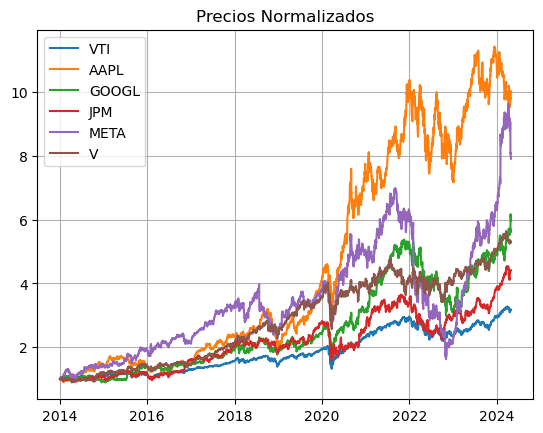

In [3]:
# Gráfica de los activos normalizados
for i in tickers:
    St['normalized_' + i] = St[i] / St[i].iloc[0]
    plt.plot(St['normalized_' + i], label = i)

plt.title('Precios Normalizados')
plt.legend()
plt.grid()

## Market beta y r2

In [4]:
# Calculemos beta y R2 de cada acción 
warnings.filterwarnings("ignore")

r2s = []
betas = []
rendimiento = []

for i in tickers:
    X = rt[['VTI']]
    y = rt[[i]]
    # Beta
    model = LinearRegression().fit(X, y)
    beta = model.coef_[0][0]
    betas.append(beta)
    # R2
    predictions = model.predict(X)
    r2 = r2_score(y_true = y, y_pred = predictions)
    r2s.append(r2)

In [5]:
df_info = pd.DataFrame({
    'tickers': tickers,
    'betas': betas,
    'r2': r2s
})
df_info

,tickers,betas,r2
0,VTI,1.000000,1.000000
1,AAPL,1.155264,0.528066
2,GOOGL,1.126683,0.507865
3,JPM,1.109703,0.543179
4,META,1.272791,0.356102
5,V,1.058507,0.587655


## Bootsrap e Histograma de market beta

In [6]:
betas = []
n_reps = 100
for i in range(n_reps):
    flag_frame = rt.sample(len(rt), replace=True)
    model = LinearRegression()
    temp_betas = []
    for j, ticker in enumerate(tickers[1:]):
        X = flag_frame[['VTI']]
        y = flag_frame[[ticker]]
        model.fit(X, y)
        beta = model.coef_[0][0]
        temp_betas.append(beta)
    betas.append(temp_betas)

df_betas = pd.DataFrame(betas, columns=tickers[1:])

df_betas

,AAPL,GOOGL,JPM,META,V
0,1.160804,1.116738,1.071400,1.267444,1.027930
1,1.180466,1.215897,1.070251,1.340012,1.059659
2,1.163609,1.125451,1.109291,1.258516,1.107153
3,1.134400,1.058676,1.148339,1.161802,1.015345
4,1.172698,1.147971,1.105311,1.263709,1.049920
...,...,...,...,...,...
95,1.143359,1.073971,1.115931,1.255223,1.095878
96,1.138039,1.137368,1.070149,1.311087,1.070712
97,1.182032,1.127093,1.121998,1.299459,1.068395
98,1.194117,1.182383,1.084871,1.319731,1.128917


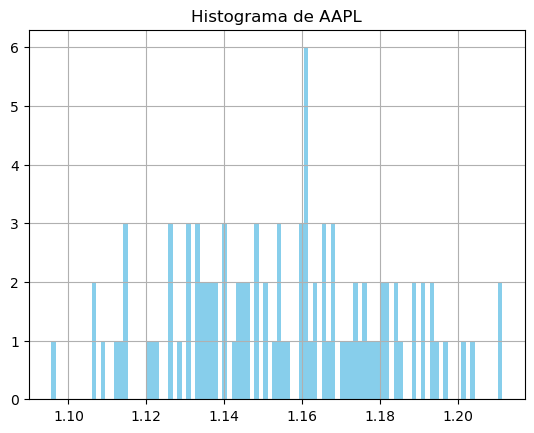

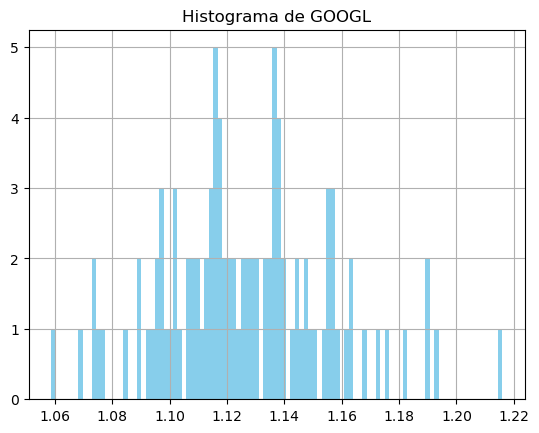

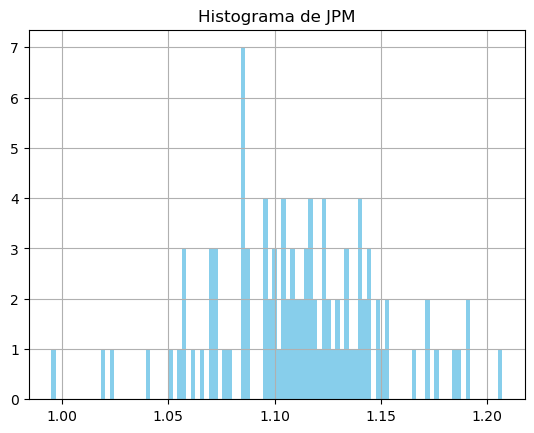

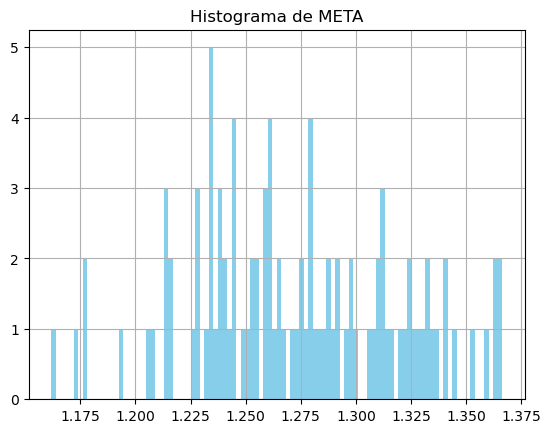

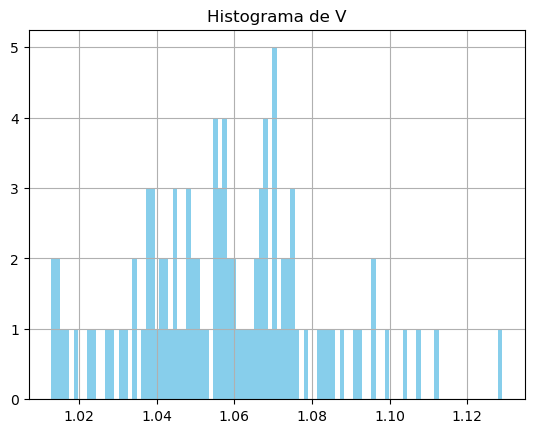

In [7]:
for col in df_betas.columns:
    plt.hist(df_betas[col], bins=100, color = 'skyblue')
    plt.title("Histograma de " + col)
    plt.grid()
    plt.show()

#### Apple

¿Cuál es la probabilidad de que la beta de Apple sea mayor a 1.17?

In [8]:
(df_betas.AAPL > 1.17).mean()

0.29

¿Cuál es la probabilidad de que la beta de Apple este entre 1.12 y 1.20?

In [9]:
((df_betas.AAPL >= 1.12) & (df_betas.AAPL <= 1.2)).mean()

0.87

#### Google

¿Cuál es la probabilidad de que la beta de Google sea mayor a 1.12?

In [10]:
(df_betas.GOOGL > 1.12).mean()

0.55

¿Cuál es la probabilidad de que la beta de Google este entre 1.08 y 1.16?

In [11]:
((df_betas.GOOGL >= 1.08) & (df_betas.GOOGL <= 1.16)).mean()

0.83

#### JP Morgan

¿Cuál es la probabilidad de que la beta de JPM sea mayor a 1.10?

In [12]:
(df_betas.JPM > 1.1).mean()

0.64

¿Cuál es la probabilidad de que la beta de JPM este entre 1.06 y 1.16?

In [13]:
((df_betas.JPM >= 1.06) & (df_betas.JPM <= 1.16)).mean()

0.82

#### META

¿Cuál es la probabilidad de que la beta de META sea mayor a 1.25?

In [14]:
(df_betas.META > 1.25).mean()

0.66

¿Cuál es la probabilidad de que la beta de META este entre 1.2 y 1.3?

In [15]:
((df_betas.META >= 1.2) & (df_betas.META <= 1.3)).mean()

0.66

#### Visa

¿Cuál es la probabilidad de que la beta de Visa sea mayor a 1.06?

In [16]:
(df_betas.V > 1.06).mean()

0.43

¿Cuál es la probabilidad de que la beta de Visa este entre 1.02 y 1.1?

In [17]:
((df_betas.V >= 1.02) & (df_betas.V <= 1.1)).mean()

0.89

## Bootsrap e Histograma de r2

In [18]:
r2 = []
n = 100
for i in range(n):
    flag_frame = rt.sample(len(rt), replace=True)
    temp_r2 = []
    for j, ticker in enumerate(tickers[1:]):
        X = flag_frame[['VTI']]
        y = flag_frame[[ticker]]
        model = LinearRegression().fit(X, y)
        predicciones = model.predict(X)
        flag_r2 = r2_score(y_true=y, y_pred=predicciones)
        temp_r2.append(flag_r2)
    r2.append(temp_r2)

df_r2 = pd.DataFrame(r2, columns=tickers[1:])
df_r2

,AAPL,GOOGL,JPM,META,V
0,0.515626,0.492303,0.533698,0.393712,0.619594
1,0.514025,0.507473,0.510865,0.319961,0.563148
2,0.476357,0.451523,0.482369,0.337892,0.529579
3,0.499775,0.481963,0.446712,0.353904,0.566417
4,0.533626,0.501157,0.551069,0.359743,0.578062
...,...,...,...,...,...
95,0.516400,0.500993,0.537124,0.353495,0.597399
96,0.546961,0.551358,0.565294,0.360710,0.619643
97,0.542284,0.479845,0.554744,0.337660,0.599088
98,0.520370,0.509029,0.559954,0.343593,0.628124


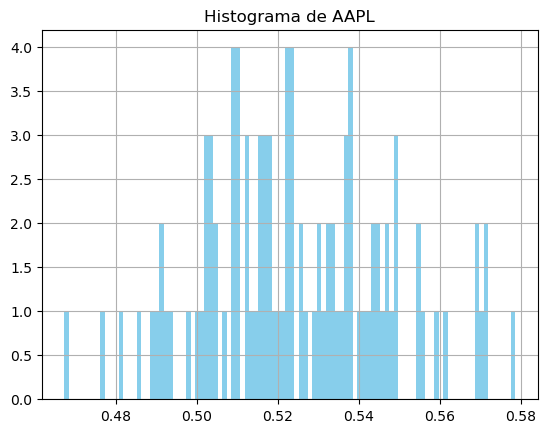

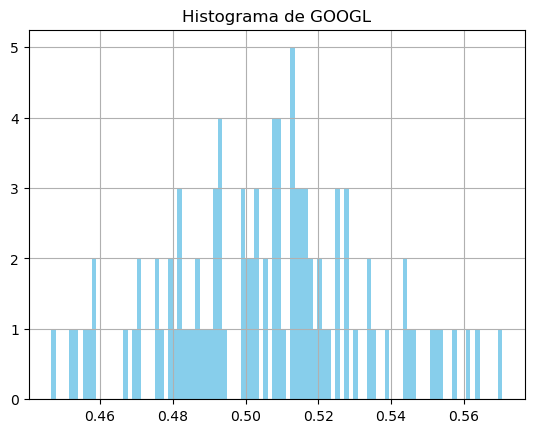

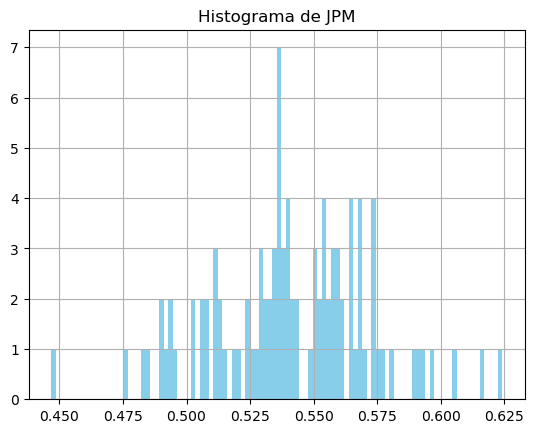

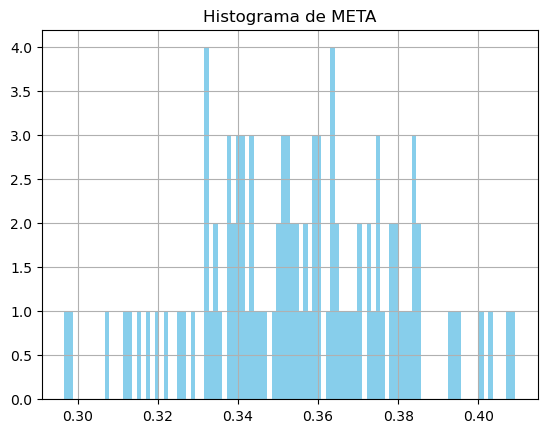

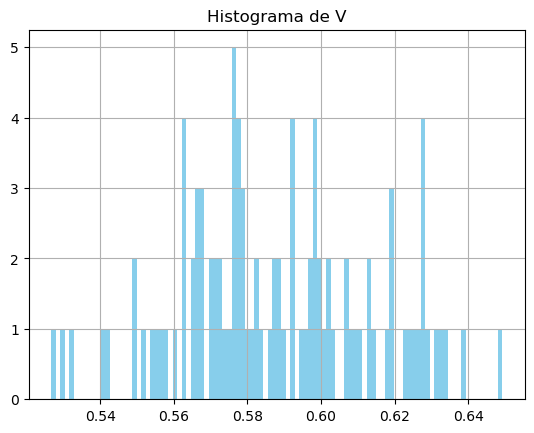

In [19]:
for col in df_r2.columns:
    plt.hist(df_r2[col], bins=100, color='skyblue')
    plt.title("Histograma de " + col)
    plt.grid()
    plt.show()

#### Apple

Probabilidad de que el 55% de la variación este explicado por el modelo

In [20]:
(df_r2.AAPL > 0.55).mean()

0.11

#### Google

Probabilidad de que el 55% de la variación este explicado por el modelo

In [21]:
(df_r2.GOOGL > 0.55).mean()

0.07

#### JP Morgan

Probabilidad de que el 55% de la variación este explicado por el modelo

In [22]:
(df_r2.JPM > 0.55).mean()

0.43

#### META

Probabilidad de que el 40% de la variación este explicado por el modelo

In [23]:
(df_r2.META > 0.4).mean()

0.04

#### Visa

Probabilidad de que el 60% de la variación este explicado por el modelo

In [24]:
(df_r2.V > 0.6).mean()

0.3

## Selección de Portafolios

In [25]:
tickers2 = ['VTI', 'XOM']
tickers = ['AAPL', 'GOOGL', 'JPM', 'META', 'V']

starts = ['2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01', 
          '2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01']
ends = ['2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', 
        '2022-01-01', '2023-01-01', '2024-01-01', '2025-01-01']
ends2 = ['2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01', 
         '2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01']
years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

rf = {"2016": 0.0067, "2017": 0.0087, 
      "2018": 0.0178, "2019": 0.0252, "2020": 0.0152, "2021": 0.0010, "2022": 0.0039, "2023": 0.045, "2024": 0.0457}

colors = ['#FF007F', '#FF3393', '#FF66B5', '#FF8AC7', '#FFB3D9', '#FFD6EB', 
          '#E6F2FF', '#CCE5FF', '#99CCFF', '#66B5FF', '#3399FF', '#007FFF']

monto = 10000

monto_dict = {}
rt_anual = {}
St_anual = {}
rt2_anual = {}
St2_anual = {}
rt_acumulado = {}
St_acumulado = {}
rt2_acumulado = {}
St2_acumulado = {}
df_e = {}
resultados_dict = {}
emv_dict = {}
emv2_dict = {}
res_dict = {}
sps = {}
erps = {}
rendis = []

for s, e in zip(starts, ends):
    St = yf.download(tickers, start=s, end=e, progress = False)['Adj Close']
    rt = St.pct_change().dropna()
    St2 = yf.download(tickers2, start=s, end=e, progress = False)['Adj Close']
    rt2 = St2.pct_change().dropna()
    year = s[:4] 
    rt_anual[year] = rt
    St_anual[year] = St
    rt2_anual[year] = rt2
    St2_anual[year] = St2
    
    
for s, e in zip(starts, ends2):
    St = yf.download(tickers, start='2014-01-01', end=e, progress = False)['Adj Close']
    rt = St.pct_change().dropna()
    St2 = yf.download(tickers2, start='2014-01-01', end=e, progress = False)['Adj Close']
    rt2 = St2.pct_change().dropna()
    year = s[:4] 
    rt_acumulado[year] = rt
    St_acumulado[year] = St
    rt2_acumulado[year] = rt2
    St2_acumulado[year] = St2

## Año 2016

#### Volatilidad y rendimiento por acción

,AAPL,GOOGL,JPM,META,V
means,0.192182,0.198845,0.106877,0.373061,0.200469
vol,0.243341,0.253893,0.201559,0.310912,0.216797


#### Mapa de correlación

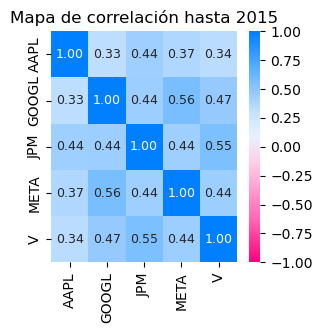

#### Portafolio EMV

,rend,vol,sharpe,AAPL,GOOGL,JPM,META,V
5198,0.277846,0.21266,1.275023,0.17798,0.034528,0.002162,0.458367,0.326962


#### Beta del portafolio

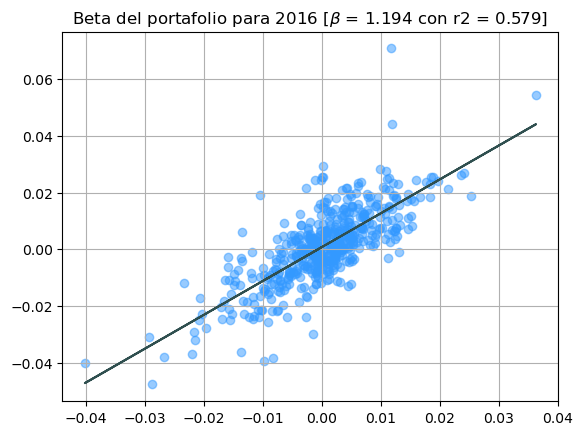

#### LAC, volatilidad y rendimiento

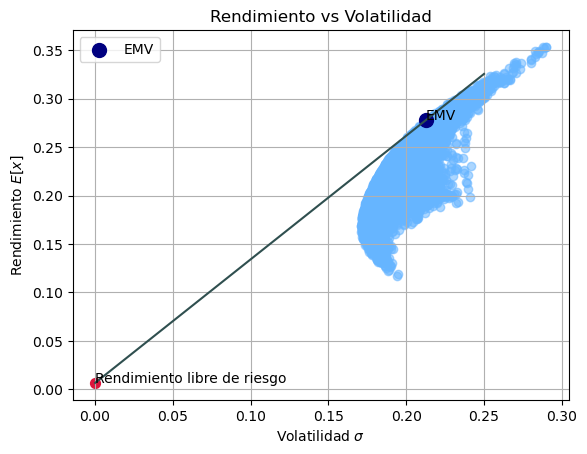

#### Aversión al riesgo y pesos

,aversion,peso_acciones,peso_bonos,rendimientos,volatilidad
0,1,5.995607,-4.995607,1.632385,1.275023
1,2,2.997803,-1.997803,0.819542,0.637512
2,3,1.998536,-0.998536,0.548595,0.425008
3,4,1.498902,-0.498902,0.413121,0.318756
4,5,1.199121,-0.199121,0.331837,0.255005
5,6,0.999268,0.000732,0.277647,0.212504
6,7,0.856515,0.143485,0.238941,0.182146
7,8,0.749451,0.250549,0.209911,0.159378
8,9,0.666179,0.333821,0.187332,0.141669
9,10,0.599561,0.400439,0.169268,0.127502




El rendimiento del portafolio de acciones fue de 9.45 %, donde se invirtio 74.95 % de nuestro dinero

El rendimiento de los bonos fue de 0.67 %, donde se invirtio 25.05 % de nuestro dinero

El rendimiento total del portafolio fue de 7.25 %

Tenemos en la cuenta $ 10724.97



## Año 2017

#### Volatilidad y rendimiento por acción

,AAPL,GOOGL,JPM,META,V
means,0.176372,0.145376,0.180347,0.293169,0.145754
vol,0.239912,0.237522,0.217566,0.301982,0.215999


#### Mapa de correlación

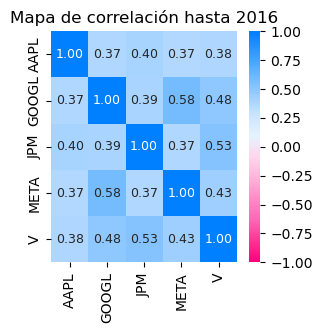

#### Portafolio EMV

,rend,vol,sharpe,AAPL,GOOGL,JPM,META,V
3094,0.222249,0.197455,1.081506,0.220269,0.009854,0.365699,0.387366,0.016812


#### Beta del portafolio

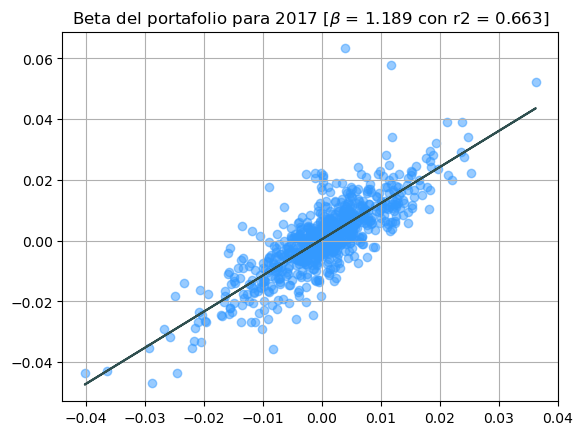

#### LAC, volatilidad y rendimiento

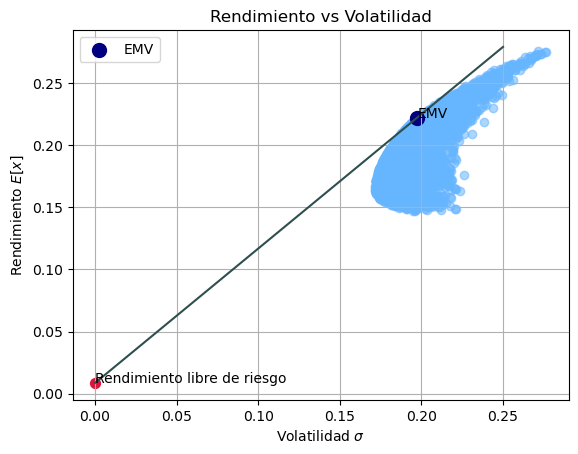

#### Aversión al riesgo y pesos

,aversion,peso_acciones,peso_bonos,rendimientos,volatilidad
0,1,5.477228,-4.477228,1.178355,1.081506
1,2,2.738614,-1.738614,0.593528,0.540753
2,3,1.825743,-0.825743,0.398585,0.360502
3,4,1.369307,-0.369307,0.301114,0.270377
4,5,1.095446,-0.095446,0.242631,0.216301
5,6,0.912871,0.087129,0.203643,0.180251
6,7,0.782461,0.217539,0.175794,0.154501
7,8,0.684653,0.315347,0.154907,0.135188
8,9,0.608581,0.391419,0.138662,0.120167
9,10,0.547723,0.452277,0.125666,0.108151




El rendimiento del portafolio de acciones fue de 40.67 %, donde se invirtio 68.47 % de nuestro dinero

El rendimiento de los bonos fue de 0.87 %, donde se invirtio 31.53 % de nuestro dinero

El rendimiento total del portafolio fue de 28.12 %

Tenemos en la cuenta $ 13740.81



## Año 2018

#### Volatilidad y rendimiento por acción

,AAPL,GOOGL,JPM,META,V
means,0.235265,0.183350,0.198047,0.330861,0.208367
vol,0.225687,0.219445,0.205126,0.275014,0.198128


#### Mapa de correlación

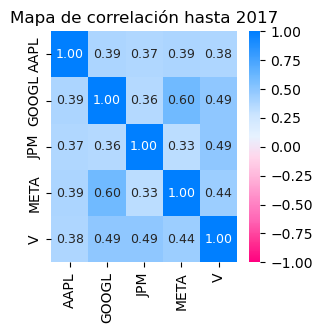

#### Portafolio EMV

,rend,vol,sharpe,AAPL,GOOGL,JPM,META,V
2348,0.254774,0.175335,1.35155,0.200044,0.0031,0.225499,0.354553,0.216804


#### Beta del portafolio

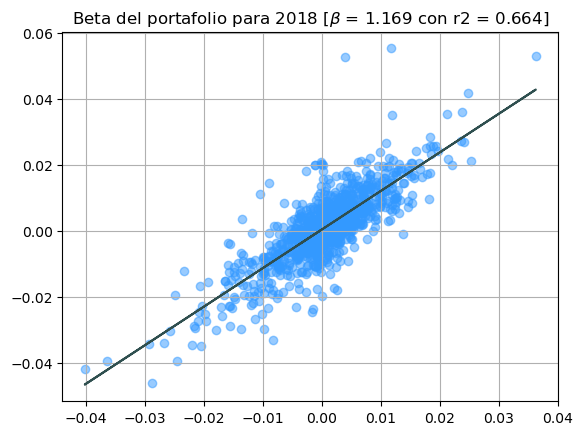

#### LAC, volatilidad y rendimiento

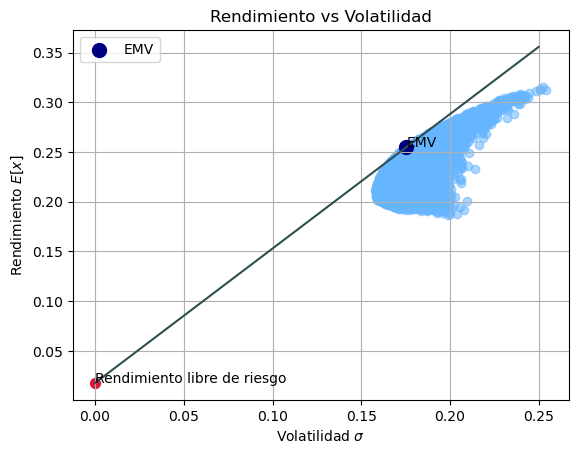

#### Aversión al riesgo y pesos

,aversion,peso_acciones,peso_bonos,rendimientos,volatilidad
0,1,7.708397,-6.708397,1.844488,1.351550
1,2,3.854198,-2.854198,0.931144,0.675775
2,3,2.569466,-1.569466,0.626696,0.450517
3,4,1.927099,-0.927099,0.474472,0.337888
4,5,1.541679,-0.541679,0.383138,0.270310
5,6,1.284733,-0.284733,0.322248,0.225258
6,7,1.101200,-0.101200,0.278755,0.193079
7,8,0.963550,0.036450,0.246136,0.168944
8,9,0.856489,0.143511,0.220765,0.150172
9,10,0.770840,0.229160,0.200469,0.135155




El rendimiento del portafolio de acciones fue de -9.48 %, donde se invirtio 96.35 % de nuestro dinero

El rendimiento de los bonos fue de 1.78 %, donde se invirtio 3.65 % de nuestro dinero

El rendimiento total del portafolio fue de -9.07 %

Tenemos en la cuenta $ 12494.63



## Año 2019

#### Volatilidad y rendimiento por acción

,AAPL,GOOGL,JPM,META,V
means,0.185406,0.153071,0.149641,0.220184,0.203733
vol,0.239246,0.233188,0.208423,0.299225,0.210143


#### Mapa de correlación

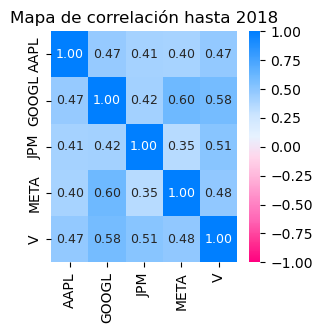

#### Portafolio EMV

,rend,vol,sharpe,AAPL,GOOGL,JPM,META,V
7735,0.196835,0.184077,0.932405,0.191503,0.000244,0.121049,0.192784,0.49442


#### Beta del portafolio

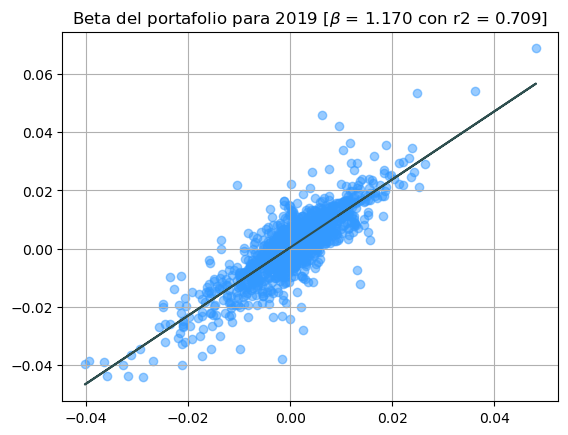

#### LAC, volatilidad y rendimiento

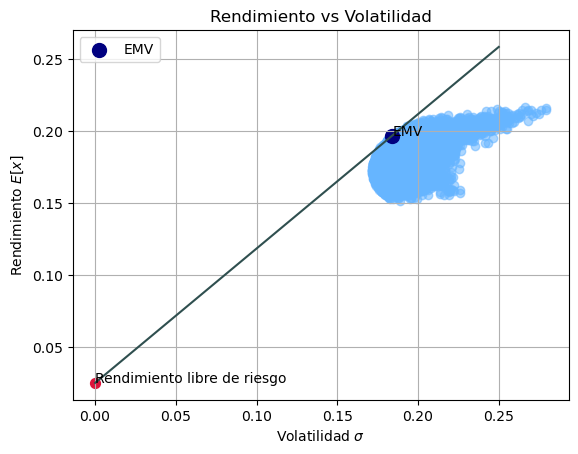

#### Aversión al riesgo y pesos

,aversion,peso_acciones,peso_bonos,rendimientos,volatilidad
0,1,5.065283,-4.065283,0.894578,0.932405
1,2,2.532641,-1.532641,0.459889,0.466202
2,3,1.688428,-0.688428,0.314993,0.310802
3,4,1.266321,-0.266321,0.242545,0.233101
4,5,1.013057,-0.013057,0.199076,0.186481
5,6,0.844214,0.155786,0.170096,0.155401
6,7,0.723612,0.276388,0.149397,0.133201
7,8,0.633160,0.366840,0.133872,0.116551
8,9,0.562809,0.437191,0.121798,0.103601
9,10,0.506528,0.493472,0.112138,0.093240




El rendimiento del portafolio de acciones fue de 53.2 %, donde se invirtio 63.32 % de nuestro dinero

El rendimiento de los bonos fue de 2.52 %, donde se invirtio 36.68 % de nuestro dinero

El rendimiento total del portafolio fue de 34.61 %

Tenemos en la cuenta $ 16819.03



## Año 2020

#### Volatilidad y rendimiento por acción

,AAPL,GOOGL,JPM,META,V
means,0.266579,0.173642,0.192238,0.264766,0.232571
vol,0.243261,0.233768,0.205062,0.295885,0.205430


#### Mapa de correlación

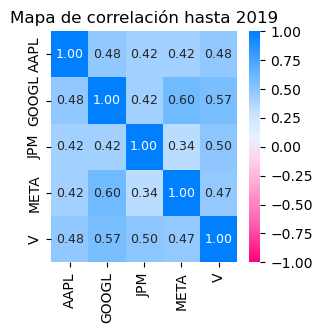

#### Portafolio EMV

,rend,vol,sharpe,AAPL,GOOGL,JPM,META,V
2013,0.240346,0.178651,1.260254,0.320995,0.012843,0.165421,0.133165,0.367577


#### Beta del portafolio

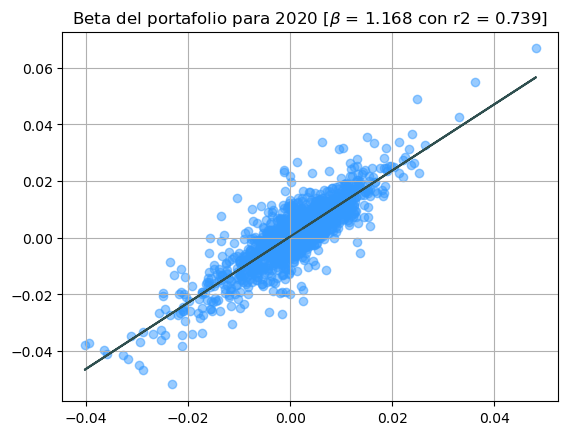

#### LAC, volatilidad y rendimiento

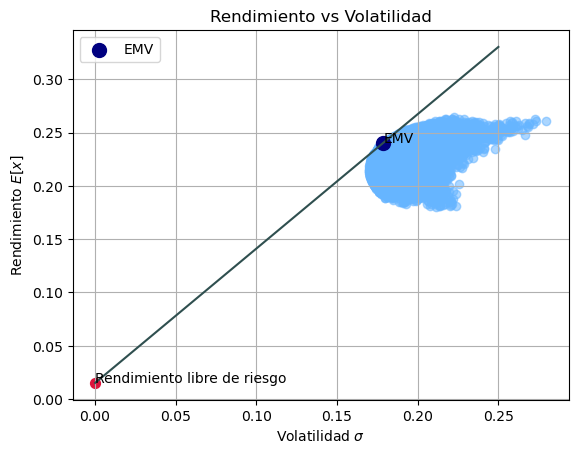

#### Aversión al riesgo y pesos

,aversion,peso_acciones,peso_bonos,rendimientos,volatilidad
0,1,7.054262,-6.054262,1.603439,1.260254
1,2,3.527131,-2.527131,0.809320,0.630127
2,3,2.351421,-1.351421,0.544613,0.420085
3,4,1.763565,-0.763565,0.412260,0.315063
4,5,1.410852,-0.410852,0.332848,0.252051
5,6,1.175710,-0.175710,0.279907,0.210042
6,7,1.007752,-0.007752,0.242091,0.180036
7,8,0.881783,0.118217,0.213730,0.157532
8,9,0.783807,0.216193,0.191671,0.140028
9,10,0.705426,0.294574,0.174024,0.126025




El rendimiento del portafolio de acciones fue de 33.96 %, donde se invirtio 88.18 % de nuestro dinero

El rendimiento de los bonos fue de 1.52 %, donde se invirtio 11.82 % de nuestro dinero

El rendimiento total del portafolio fue de 30.13 %

Tenemos en la cuenta $ 21886.44



## Año 2021

#### Volatilidad y rendimiento por acción

,AAPL,GOOGL,JPM,META,V
means,0.329867,0.197818,0.177522,0.282788,0.234797
vol,0.286200,0.260729,0.279787,0.324228,0.249428


#### Mapa de correlación

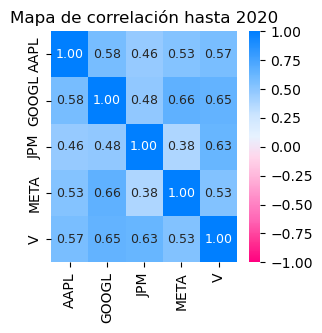

#### Portafolio EMV

,rend,vol,sharpe,AAPL,GOOGL,JPM,META,V
9495,0.289858,0.238288,1.212222,0.522401,0.002808,0.004914,0.12048,0.349397


#### Beta del portafolio

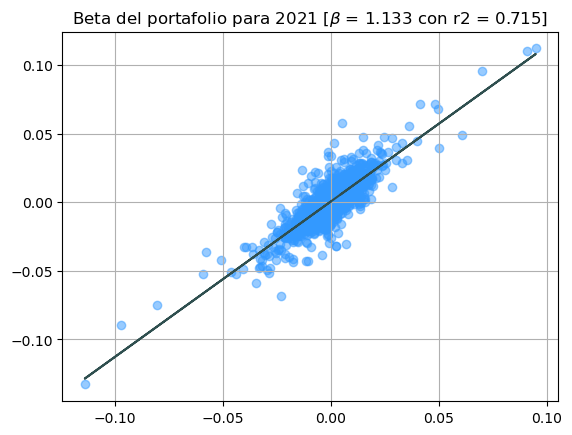

#### LAC, volatilidad y rendimiento

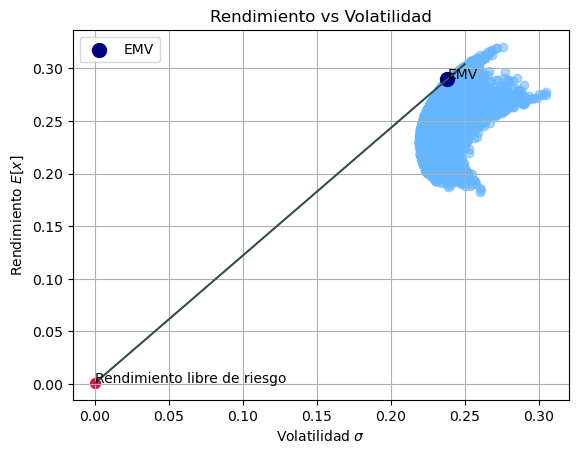

#### Aversión al riesgo y pesos

,aversion,peso_acciones,peso_bonos,rendimientos,volatilidad
0,1,5.087207,-4.087207,1.470482,1.212222
1,2,2.543603,-1.543603,0.735741,0.606111
2,3,1.695736,-0.695736,0.490827,0.404074
3,4,1.271802,-0.271802,0.368371,0.303056
4,5,1.017441,-0.017441,0.294896,0.242444
5,6,0.847868,0.152132,0.245914,0.202037
6,7,0.726744,0.273256,0.210926,0.173175
7,8,0.635901,0.364099,0.184685,0.151528
8,9,0.565245,0.434755,0.164276,0.134691
9,10,0.508721,0.491279,0.147948,0.121222




El rendimiento del portafolio de acciones fue de 23.28 %, donde se invirtio 63.59 % de nuestro dinero

El rendimiento de los bonos fue de 0.1 %, donde se invirtio 36.41 % de nuestro dinero

El rendimiento total del portafolio fue de 14.84 %

Tenemos en la cuenta $ 25134.55



## Año 2022

#### Volatilidad y rendimiento por acción

,AAPL,GOOGL,JPM,META,V
means,0.329764,0.239677,0.188804,0.278896,0.208674
vol,0.281981,0.258636,0.272353,0.320723,0.248401


#### Mapa de correlación

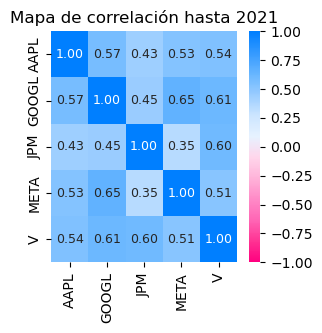

#### Portafolio EMV

,rend,vol,sharpe,AAPL,GOOGL,JPM,META,V
790,0.29418,0.239411,1.212478,0.598481,0.138311,0.07474,0.145729,0.042739


#### Beta del portafolio

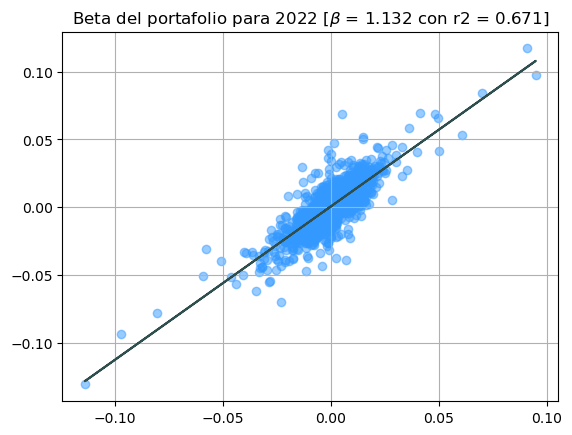

#### LAC, volatilidad y rendimiento

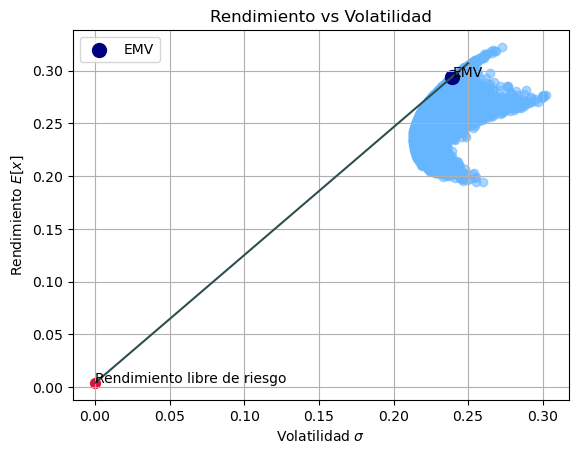

#### Aversión al riesgo y pesos

,aversion,peso_acciones,peso_bonos,rendimientos,volatilidad
0,1,5.064418,-4.064418,1.474002,1.212478
1,2,2.532209,-1.532209,0.738951,0.606239
2,3,1.688139,-0.688139,0.493934,0.404159
3,4,1.266105,-0.266105,0.371425,0.303119
4,5,1.012884,-0.012884,0.297920,0.242496
5,6,0.844070,0.155930,0.248917,0.202080
6,7,0.723488,0.276512,0.213915,0.173211
7,8,0.633052,0.366948,0.187663,0.151560
8,9,0.562713,0.437287,0.167245,0.134720
9,10,0.506442,0.493558,0.150910,0.121248




El rendimiento del portafolio de acciones fue de -33.0 %, donde se invirtio 63.31 % de nuestro dinero

El rendimiento de los bonos fue de 0.39 %, donde se invirtio 36.69 % de nuestro dinero

El rendimiento total del portafolio fue de -20.75 %

Tenemos en la cuenta $ 19920.08



## Año 2023

#### Volatilidad y rendimiento por acción

,AAPL,GOOGL,JPM,META,V
means,0.266144,0.166255,0.157763,0.157976,0.186940
vol,0.291372,0.275942,0.275386,0.370836,0.255855


#### Mapa de correlación

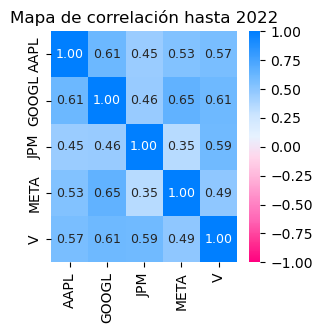

#### Portafolio EMV

,rend,vol,sharpe,AAPL,GOOGL,JPM,META,V
7681,0.24624,0.26143,0.769767,0.769337,0.000655,0.038396,0.017268,0.174343


#### Beta del portafolio

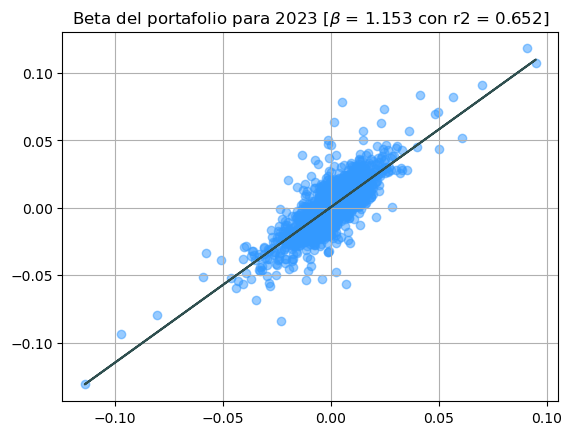

#### LAC, volatilidad y rendimiento

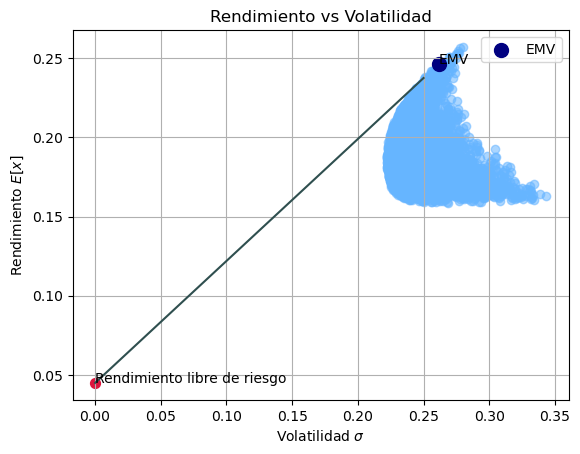

#### Aversión al riesgo y pesos

,aversion,peso_acciones,peso_bonos,rendimientos,volatilidad
0,1,2.944442,-1.944442,0.637541,0.769767
1,2,1.472221,-0.472221,0.341270,0.384883
2,3,0.981481,0.018519,0.242514,0.256589
3,4,0.736111,0.263889,0.193135,0.192442
4,5,0.588888,0.411112,0.163508,0.153953
5,6,0.490740,0.509260,0.143757,0.128294
6,7,0.420635,0.579365,0.129649,0.109967
7,8,0.368055,0.631945,0.119068,0.096221
8,9,0.327160,0.672840,0.110838,0.085530
9,10,0.294444,0.705556,0.104254,0.076977




El rendimiento del portafolio de acciones fue de 51.13 %, donde se invirtio 36.81 % de nuestro dinero

El rendimiento de los bonos fue de 4.5 %, donde se invirtio 63.19 % de nuestro dinero

El rendimiento total del portafolio fue de 21.66 %

Tenemos en la cuenta $ 24235.44



## Año 2024

#### Volatilidad y rendimiento por acción

,AAPL,GOOGL,JPM,META,V
means,0.281721,0.200382,0.170994,0.258039,0.192966
vol,0.283805,0.278812,0.269378,0.374107,0.247689


#### Mapa de correlación

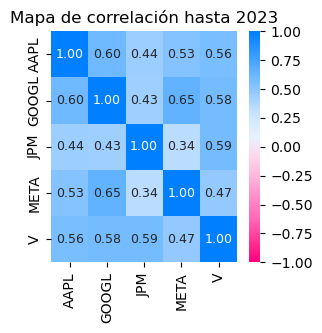

#### Portafolio EMV

,rend,vol,sharpe,AAPL,GOOGL,JPM,META,V
7958,0.264436,0.25619,0.853804,0.736119,0.004258,0.033966,0.105273,0.120384


#### Beta del portafolio

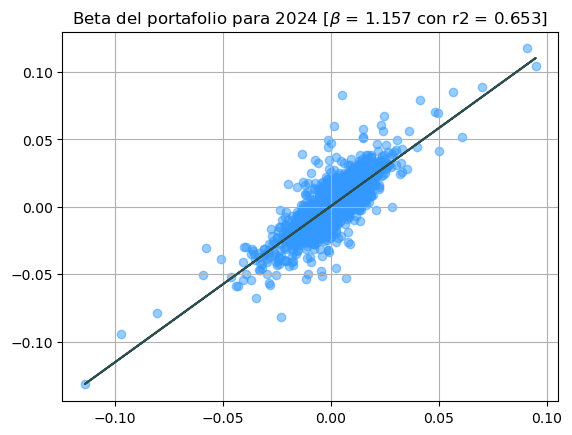

#### LAC, volatilidad y rendimiento

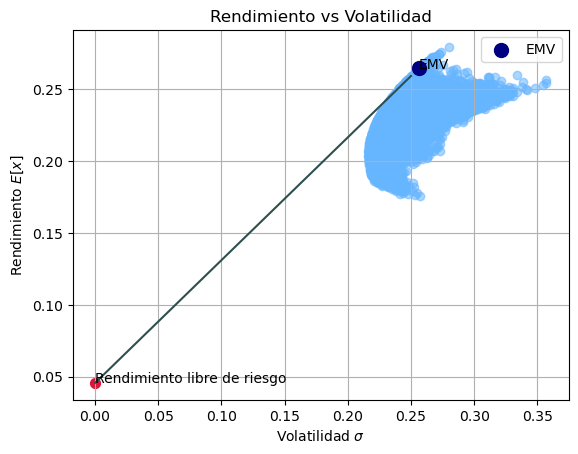

#### Aversión al riesgo y pesos

,aversion,peso_acciones,peso_bonos,rendimientos,volatilidad
0,1,3.332702,-2.332702,0.774681,0.853804
1,2,1.666351,-0.666351,0.410190,0.426902
2,3,1.110901,-0.110901,0.288694,0.284601
3,4,0.833175,0.166825,0.227945,0.213451
4,5,0.666540,0.333460,0.191496,0.170761
5,6,0.555450,0.444550,0.167197,0.142301
6,7,0.476100,0.523900,0.149840,0.121972
7,8,0.416588,0.583412,0.136823,0.106725
8,9,0.370300,0.629700,0.126698,0.094867
9,10,0.333270,0.666730,0.118598,0.085380




El rendimiento del portafolio de acciones fue de -0.91 %, donde se invirtio 41.66 % de nuestro dinero

El rendimiento de los bonos fue de 4.57 %, donde se invirtio 58.34 % de nuestro dinero

El rendimiento total del portafolio fue de 2.29 %

Tenemos en la cuenta $ 24789.69



In [26]:
for y in years:
    
    fecha = f'## Año {y}'
    display(Markdown(fecha))
    
    # Rendimiento y volatilidad
    
    df = pd.DataFrame({
        'means': rt_acumulado[y].mean() * 252,
        'vol': rt_acumulado[y].std() * np.sqrt(252)
    })
    year = y
    df_e[year] = df
    
    display(Markdown('#### Volatilidad y rendimiento por acción'))
    display(df_e[y].T)
    
    # Mapas de correlación
    display(Markdown('#### Mapa de correlación'))
    
    custom_cmap = LinearSegmentedColormap.from_list("custom_pink_blue", colors)

    c = rt_acumulado[y].corr()
    plt.figure(figsize=(3,3))
    plt.title('Mapa de correlación hasta '+ str(int(y) - 1))
    sns.heatmap(c, vmin = -1, vmax = 1, cmap = custom_cmap, annot = True, fmt = '.2f', annot_kws={"size": 9})
    plt.show()
    
    # Porafolio EMV

    sigma = rt_acumulado[y].cov()
    n_port = 10000
    n_act = len(rt_acumulado[y].keys())
    W = np.random.dirichlet((1,) * n_act, size=n_port)

    rendimientos = W.dot(rt_acumulado[y].mean()) * 252

    zeros = np.zeros(n_port)
    for i in range(len(zeros)):
        zeros[i] = np.sqrt(W[i,:].dot(sigma).dot(W[i,:])) * np.sqrt(252)
    volatility = zeros

    sharpe = (rendimientos - rf[y]) / volatility

    resultados = pd.DataFrame({
        'rend': rendimientos,
        'vol': volatility,
        'sharpe': sharpe
    })
    pesos = pd.DataFrame(W, columns=rt_acumulado[y].keys())
    resultados = pd.concat([resultados, pesos], axis=1)
    emv = resultados[resultados.sharpe == resultados.sharpe.max()]

    resultados_dict[y] = resultados
    emv_dict[y] = emv
    
    display(Markdown('#### Portafolio EMV'))
    display(emv_dict[y])
    
    # Beta
    
    display(Markdown('#### Beta del portafolio'))
    
    emv2 = emv_dict[y].drop(['rend','vol','sharpe'], axis=1)
    emv2_dict[y] = emv2
    daily_ret_port_beta = rt_acumulado[y].dot(emv2.values[0])
    rt2_acumulado[y]['portafolios'] = daily_ret_port_beta

    model = LinearRegression()
    X = rt2_acumulado[y][['VTI']]
    y_values = rt2_acumulado[y]['portafolios']

    model.fit(X, y_values)
    predicciones = model.predict(X)

    beta_port = np.round(model.coef_[0], 4)
    r2_port = np.round(r2_score(y_values, predicciones), 4)

    plt.scatter(X, y_values, c='#3399FF', alpha = 0.5)
    plt.plot(X, predicciones, c='darkslategrey')
    plt.title(r'Beta del portafolio para {} [$\beta$ = {:.3f} con r2 = {:.3f}]'.format(int(y), beta_port, r2_port))
    plt.grid()
    plt.show()

    # LAC
    
    display(Markdown('#### LAC, volatilidad y rendimiento'))
    
    erp = emv_dict[y].rend.iloc[0]
    sp = emv_dict[y].vol.iloc[0]
    erps[y] = erp
    sps[y] = sp

    s = np.linspace(0,0.25,10)

    lac = rf[y] + s * emv_dict[y].sharpe.iloc[0]

    plt.scatter(resultados_dict[y].vol, resultados_dict[y].rend, c = '#66B5FF', alpha = 0.55)

    plt.scatter(0, rf[y], s = 50, c = 'crimson')
    plt.text(0, rf[y], 'Rendimiento libre de riesgo')

    plt.scatter(emv_dict[y].vol, emv_dict[y].rend, c = 'navy', s=100, label = 'EMV')
    plt.text(emv_dict[y].vol, emv_dict[y].rend, 'EMV')

    plt.plot(s, lac, c = 'darkslategrey')

    plt.legend()
    plt.title('Rendimiento vs Volatilidad')
    plt.xlabel('Volatilidad $\sigma$')
    plt.ylabel('Rendimiento $E[x]$')
    plt.grid()
    plt.show()
    
        
    # Asignación por aversión al riesgo 
    
    alpha = [1,2,3,4,5,6,7,8,9,10]

    w_opt= []
    for i in alpha:
        w_opt.append(((erps[y]-rf[y])/(i*sps[y]**2)))

    riesgo = []
    for j in range(10):
        riesgo.append(w_opt[j]*sps[y])

    dist = pd.DataFrame()
    dist['aversion'] = alpha
    dist['peso_acciones'] = w_opt
    dist['peso_bonos'] = 1-dist.peso_acciones
    dist['rendimientos'] = dist.peso_acciones * erp + dist.peso_bonos * rf[y]
    dist['volatilidad'] = riesgo
    res_dict[y] = dist
    
    
    display(Markdown('#### Aversión al riesgo y pesos'))
    display(res_dict[y])
    print()
    
    # Resultados
    
    primero = St_anual[y].iloc[0]  
    ultimo = St_anual[y].iloc[-1] 
    rend_total = ultimo / primero -1
    rend_total = pd.DataFrame(rend_total, columns=['rend'])
    rend_total['pesos'] = emv2_dict[y].values[0]

    ve = (rend_total.rend * rend_total.pesos).sum()
    
    
    stock = monto * res_dict[y].peso_acciones[7]
    bonds = monto * res_dict[y].peso_bonos[7]

    monto = stock * (1 + ve) + bonds * (1 + rf[y])
    monto_dict[y] = monto
    total = ve * res_dict[y].peso_acciones[7] + rf[y] * res_dict[y].peso_bonos[7]
    
    rendis.append(total)

    print()

    print('El rendimiento del portafolio de acciones fue de', np.round(ve * 100,2), 
          '%, donde se invirtio', np.round(res_dict[y].peso_acciones[7] * 100,2), '% de nuestro dinero')
    print()

    print('El rendimiento de los bonos fue de', np.round(rf[y] * 100, 2), '%, donde se invirtio'
          , np.round(res_dict[y].peso_bonos[7] * 100,2), '% de nuestro dinero')
    print()

    print('El rendimiento total del portafolio fue de', np.round(total * 100,2), '%')
    print()

    print('Tenemos en la cuenta $', np.round(monto,2))
    
    print()
    
    # Gráfica final
    
#     display(Markdown('#### Comportamiento del portafolio'))
    
#     daily_ret_port = rt_anual[y].dot(emv2_dict[y].values[0])
#     graf = pd.DataFrame()
#     graf['port'] = daily_ret_port
#     graf['libre_riesgo'] = ((1 + rf[y]) ** (1 / len(rt_anual))) - 1
    
        
#     rend_port = graf.port * res_dict[y].peso_acciones[7] + graf.libre_riesgo * res_dict[y].peso_bonos[7]
#     if y == '2016':
#         precio_port = (1 + rend_port).cumprod() * 10000
#     else:
#         precio_port = (1 + rend_port).cumprod() * monto_dict[str(int(y)-1)]
    
#     plt.figure(figsize = (7,5))
#     plt.plot(precio_port, c = 'steelblue')

#     plt.title('Rendimiento del portafolio '+ str(y))
#     plt.grid()
#     plt.show()

## Evaluación del Rendimiento

In [27]:
df_rendis = pd.DataFrame()
df_rendis['año'] = years
df_rendis['rendimiento'] = rendis
df_rendis

,año,rendimiento
0,2016,0.072497
1,2017,0.281198
2,2018,-0.090692
3,2019,0.346101
4,2020,0.301290
5,2021,0.148407
6,2022,-0.207462
7,2023,0.216634
8,2024,0.022870


### Rendimiento total del periodo de tenencia

In [28]:
print(np.round((monto_dict['2024']/10000-1) * 100,2), '%')

147.9 %


In [29]:
print(np.round(((1 + df_rendis.rendimiento).prod()-1) * 100, 2), '%')

147.9 %


### Rendimiento promedio anual

In [30]:
df_rendis.rendimiento.mean()

0.12120470726408938

In [31]:
rg = (1 + df_rendis.rendimiento).prod()**(1/len(df_rendis)) - 1
print(np.round(rg * 100, 2), '%')

10.61 %


### Dinero total en la cuenta

In [32]:
monto_dict['2024']

24789.693102683974

In [33]:
10000 * (1 + df_rendis.rendimiento).prod()

24789.69310268398

In [34]:
10000 * (1+rg)**len(df_rendis)

24789.693102683977